<a href="https://colab.research.google.com/github/yym10618/Colab/blob/master/Ch01.%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EA%B8%B0%EC%B4%88/7_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EC%8B%9C%EA%B0%81%ED%99%94_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# 한글 형태소 분석기 설치
!pip3 install konlpy

     |████████████████████████████████| 19.4 MB 5.6 MB/s 
     |████████████████████████████████| 448 kB 41.8 MB/s 


In [11]:
"""
날짜 : 2022/04/27
이름 : 양용민
내용 : 파이썬 텍스트 시각화 실습하기
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
from konlpy.tag import Okt



In [3]:
# 데이터 불러오기
txt_data = open('/content/drive/MyDrive/파이썬 데이터 과학 실습/file/wordcloud_data.txt').read()
txt_data

'\ufeff\ufeff스마트 기기와 SNS 덕분에 과거 어느 때보다 많은 데이터가 흘러 다니고 빠르게 쌓입니다. 다음 그림은 2013년에 인터넷에서 60초 동안 얼마나 많은 일이 벌어지는지를 나타낸 그림이다. Facebook에서는 1초마다 글이 4만 천 건 포스팅되고, 좋아요 클릭이 180만 건 발생합니다. 데이터는 350GB씩 쌓입니다. 이런 데이터를 실시간으로 분석하면 사용자의 패턴을 파악하거나 의사를 결정하는 데 참고하는 등 다양하게 사용할 수 있을 것입니다. \n빅데이터를 처리하는 프레임워크로 흔히 Hadoop MapReduce를 사용한다. MapReduce는 페타바이트 이상의 데이터를 여러 노드로 구성된 클라우드 환경에서 병렬 처리하는 기법으로, 함수형 프로그래밍에서 일반적으로 사용되는 Map과 Reduce 방식을 사용해 데이터를 처리한다. MapReduce는 대량 데이터를 분산 처리할 수 있는 좋은 기법이지만, 배치 방식으로 데이터를 처리하기 때문에 실시간으로 데이터를 조회하기 어렵다. 이런 단점을 극복하기 위해 최근 몇 년간 실시간 분산 쿼리나 스트리밍 처리 기법이 많이 연구되었다.\n실시간 분산 쿼리는 클러스터를 구성하는 노드가 각자 쿼리를 처리하게 해(push down) 한 번에 처리할 데이터의 크기는 작게 하면서 이를 병렬 처리해 응답 시간을 실시간 수준으로 높이는 방식이다. Dremel의 논문을 기반으로 한 Cloudera의 Impala와 Apache Tez, 그리고 최근 공개된 Facebook의 Presto가 이 방식에 속한다.\n스트리밍 처리는 끊임없이 들어오는 데이터를 유입 시점에 분석해 원하는 데이터 뷰로 미리 만드는 방식이다. 이 방식은 CEP(complex event processing)라고도 부르며, Twitter의 Storm과 Apache Spark가 이 방식에 속한다.\n분산 환경에서 데이터를 단일 뷰로 제공하는 것은 쉽지 않다. 이런 환경에서 기본적인 분산 처리 방식을 살펴보면 다음과 같다.\n클러스터를 구성하는 여러 노

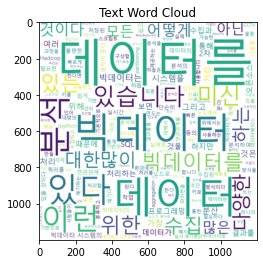

In [7]:
# 텍스트 시각화(단어구름)
wc = WordCloud(width  = 1200, 
               height = 1200,
               background_color = 'white',
               font_path = '/content/drive/MyDrive/파이썬 데이터 과학 실습/file/malgun.ttf').generate(txt_data)

plt.title('Text Word Cloud')
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

In [12]:
# 텍스트 형태소 분석기 생성
okt = Okt()
okt

In [16]:
# 형태소 분석
result1 = okt.pos('아버지가 방에 들어가십니다.')
result2 = okt.pos('아버지 가방에 들어가십니다.')
result3 = okt.nouns('나는 어제 보리밥을 먹었다.')

print('result1 :', result1)
print('result2 :', result2)
print('result3 :', result3)

result1 : [('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가십니다', 'Verb'), ('.', 'Punctuation')]
result2 : [('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가십니다', 'Verb'), ('.', 'Punctuation')]
result3 : ['나', '어제', '보리밥']


In [ ]:
# 텍스트 정제
txt_nouns = okt.nouns(txt_data)
txt_nouns

In [18]:
# 데이터 변환
str_nouns = " ".join(txt_nouns) # 하나의 문자열로 연결

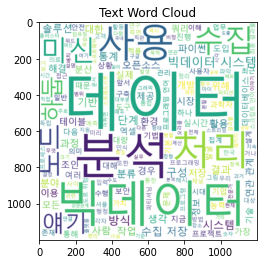

In [20]:
# 텍스트 시각화(단어구름)
wc = WordCloud(width  = 1200, 
               height = 1200,
               background_color = 'white',
               font_path = '/content/drive/MyDrive/파이썬 데이터 과학 실습/file/malgun.ttf').generate(str_nouns)

plt.title('Text Word Cloud')
plt.imshow(wc, interpolation = 'bilinear')
plt.show()